# Iris dataset
***

The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a study done by the the statistician and biologist Ronald Fisher in the year of 1936. It consist in the observation of iris flowers and I will analyse it in this project.

![iris_setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg) *Fig. 1 Iris setosa*
![iris_versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/256px-Iris_versicolor_3.jpg) *Fig. 2 Iris versicolor*
![iris_virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/256px-Iris_virginica.jpg)*Fig. 3 iris virginica*

*All photos were taken from Wikipedia, in the link above.*

This notebook contains a detailed explanation of my Python script, [analysis.py](analysis.py), and it also includes comparison with other studies.

## Loading data
***
In order to analyse this data set, I downloaded it through the following [link](https://archive.ics.uci.edu/dataset/53/iris). Then I extracted the files from zip file into my pands-project folder.

Now to import the data into the script, I need to use Pandas library. Pandas includes many important tools that will use the data for a complete analysis. [Pandas Cited](https://pandas.pydata.org/docs/getting_started/overview.html): 

"pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.".

In [1]:
import pandas as pd

The file iris.data contains the information about the samples, but because it doesn't have column names, I will give the names taking into consideration the file iris.names, where it mentions the attributes of the samples in section 7. If no column names are in place, pandas won't be able to identify the attributes of the samples, because the values don't have labels and that will make impossible to call them.

The code below shows how to create a path for the downloaded data file and a tuple with the column names.
Now to load the data into the script, I use Pandas function [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), with the file path plus the column names.

In [2]:
path = "./iris/"
logFilename = path + "iris.data"

colNames= ("sepal_length_cm",
    "sepal_width_cm", 
    "petal_length_cm", 
    "petal_width_cm", 
    "class" 
)

df = pd.read_csv(logFilename, names=colNames)

## Summary of the variables
***
In order to do a summary of variables, I request the machine to describe the variables with [df.describe()](https://www.w3schools.com/python/pandas/ref_df_describe.asp) and then create a txt file with that information with the code [a.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html), with a title, each description in a new line and writing mode to create it.

In [19]:
a=df.describe()

a.to_csv("Summary of each variable.txt", sep="\t", mode="w")

I copied the details of the txt file in following table:

|     |sepal_length_cm   |sepal_width_cm    |petal_length_cm   |petal_width_cm    |
|-----|------------------|------------------|------------------|------------------|
|count|150.0	         |150.0	            |150.0	           |150.0             |
|mean |5.843333333333334 |3.0540000000000003|3.758666666666666 |1.1986666666666668|
|std  |0.8280661279778629|0.4335943113621737|1.7644204199522617|0.7631607417008414|
|min  |4.3               |2.0               |1.0               |0.1               |
|25%  |5.1	             |2.8	            |1.6	           |0.3               |
|50%  |5.8               |3.0           	|4.35              |1.3               |
|75%  |6.4               |3.3               |5.1               |1.8               |
|max  |7.9	             |4.4	            |6.9               |2.5               |

While analysing the results, I can see information about: 
* count - there's 150 samples; 
* mean - average number registered in the samples;
* std - standard deviation shows how far most of the values are from the mean values;
* min - minimum value registered;
* 25% - percentage of samples that between the minimum values and the value presented;
* 50% - percentage of samples between the values of 25%, exclusive, and 50% inclusive;
* 75% - percentage of samples between the values of 50%, exclusive, and 75% inclusive;
* max - maximum value registered.

## Histograms and bar charts
***
Now for the visualization of the variables, I need Numpy and Matplotlib libraries. [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) stores arrays in a easy and fast way and [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) reproduces plots of variables through images.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

Before I try to plot the variables in histograms and bar charts, I need to [know their type](https://pbpython.com/pandas_dtypes.html), because that will be determinant in which kind of plot can be used, so no errors will occur and the output will be clear. In order to get that information I need to use [df.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html).

In [5]:
df.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

Inside of the study there're float and object variables. Now I will simply [call](https://www.datacamp.com/tutorial/python-select-columns) one the float variables and check the arrays with the [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html),  and then I will check same for the object type.

In [6]:
slen = df["sepal_length_cm"]
values, counts = np.unique(slen, return_counts=True)
values, counts

(array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]),
 array([ 1,  3,  1,  4,  2,  5,  6, 10,  9,  4,  1,  6,  7,  6,  8,  7,  3,
         6,  6,  4,  9,  7,  5,  2,  8,  3,  4,  1,  1,  3,  1,  1,  1,  4,
         1], dtype=int64))

In [7]:
s = df["class"]
values2, counts2 = np.unique(s, return_counts=True)
values2, counts2

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

The arrays show that float types cannot be represented in bar charts because there're too many arrays, where each sample can have a different value. If floats are plotted in a bar chart, the samples will be in top of each other, while the histogram can actually be better to represent because many values can be put together in the same interval, so it's easier to analyse. As for the object type, the bar chart can be used because there's only 3 arrays inside of it, with a clear number of different class of Iris flowers, as demonstrated above.

### Histogram of variables together
***
To do the histogram, I need to call variables for each attribute. After that I use the function [plt.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to create a histogram for each variable, with label of the attribute, customization with color and step type so no variable will be block by another. Then I add title with [plt.title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), labels of each axis with [ptl.xlabel()]((https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)) and [ptl.ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html), and a legend with [ptl.legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). To save the histogram as an png file, I use the function [plt.savefig()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). Finally plot the histogram with [plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

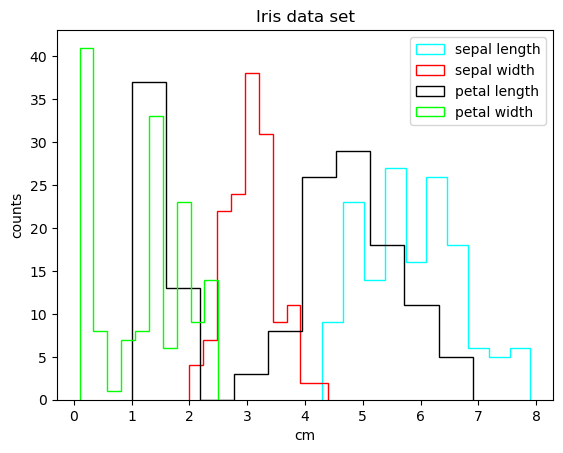

In [8]:
slen = df["sepal_length_cm"]
swid = df["sepal_width_cm"]
plen = df["petal_length_cm"]
pwid = df["petal_width_cm"]

plt.hist(slen, label= "sepal length", color="cyan", histtype="step")
plt.hist(swid, label= "sepal width", color = "red", histtype="step")
plt.hist(plen, label= "petal length", color = "black", histtype="step")
plt.hist(pwid, label="petal width", color = "lime", histtype="step")
plt.title("Iris data set")
plt.xlabel("cm")
plt.ylabel("counts")
plt.legend()
#plt.savefig("Histogram with variables together.png") 
plt.show()

### Histograms of each variable
***
There's another possible way to plot the variables in separate histograms in a single figure. First I need to use fig, axes = [plt.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to create a figure with 4 histograms with the layout 2 rows and 2 columns, and then [size in inches](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure). After that I will do a histogram for each variable individually, choosing the position of them with axes[row, column], as demonstrated in [matplotlib](https://matplotlib.org/stable/users/explain/axes/axes_intro.html#creating-axes). Then I will [customize](https://python-graph-gallery.com/basic-histogram-in-matplotlib/) with a edge color, using the same colors of previous histogram. I will also add a title individually for each histogram with axes[row, column].set_title(). Finally I save it and show it with same code used above.

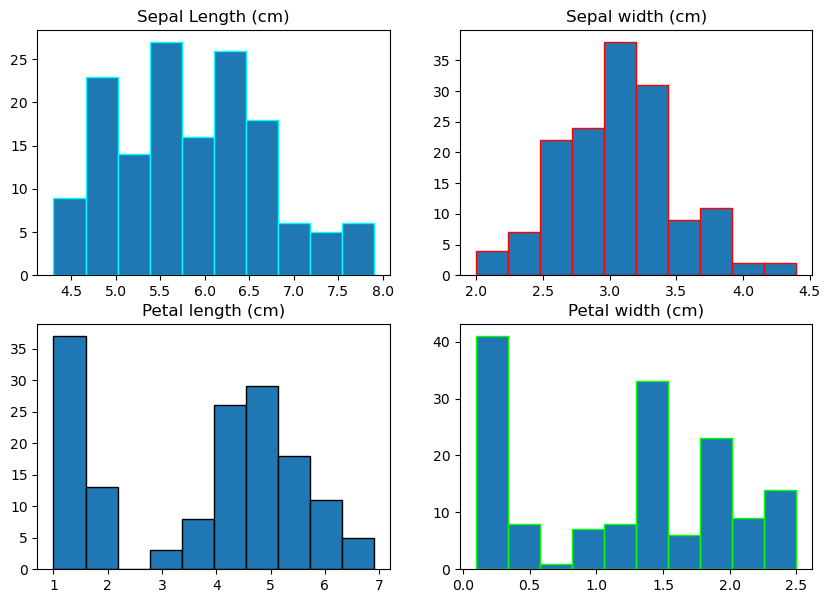

In [9]:
fig, axes = plt.subplots(2,2, figsize=(10, 7))

axes[0, 0].hist(slen, edgecolor = "cyan")
axes[0, 0].set_title("Sepal Length (cm)")
axes[0, 1].hist(swid, edgecolor = "red")
axes[0, 1].set_title("Sepal width (cm)")
axes[1, 0].hist(plen, edgecolor = "black")
axes[1, 0].set_title("Petal length (cm)")
axes[1, 1].hist(pwid, edgecolor = "lime")
axes[1, 1].set_title("Petal width (cm)")

#plt.savefig("Histograms of each variable.png") 
plt.show()

### Bar chart
***
The only variable in this data set that can be plotted in bar chart is the class of Iris flowers, where there is only 3 possible answers as mentioned above. Now to create a bar chart I will use the [plt.bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html), with the values and counts done previously for class, added customization of bar colors, and a title. 

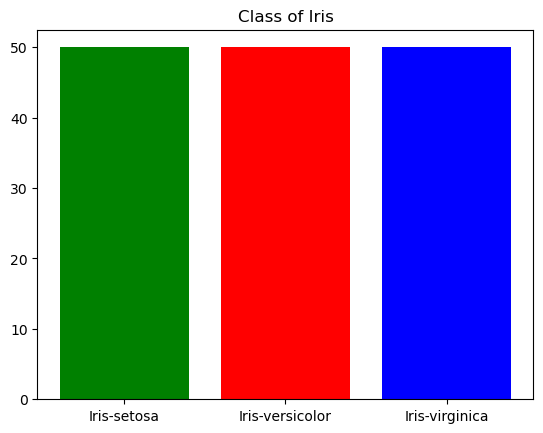

In [10]:
plt.bar(values2, counts2, color=["green", "red","blue"])
plt.title("Class of Iris")
#plt.savefig("Class of Iris bar chart.png")
plt.show()

## Correlation
***
The analysis of a data set is so much more interesting when variables present some kind of relation between another. This is called correlation, and that can be done in many ways. I will show it through scatter plots and Pearson coefficient. I will also approach the results from other analysis of the Iris dataset and compare them with my results.

https://realpython.com/numpy-scipy-pandas-correlation-python/#correlation
https://realpython.com/visualizing-python-plt-scatter/#creating-scatter-plots
https://realpython.com/numpy-scipy-pandas-correlation-python/#pearson-correlation-coefficient

### Scatter plots
***
Scatter plots shows all the samples of each attribute in one figure. I can only consider the numerical variables to analyse the correlation. If I try to plot the object type of variable, "class", with any other variable, it will simply show a straight line of samples. It's impossible to measure correlation between two variables where one of them is not numerical. To confirm this, I will do a scatter of sepal length and class with the plt.scatter() function.

https://python-graph-gallery.com/scatter-plot/
https://www.w3schools.com/python/matplotlib_scatter.asp

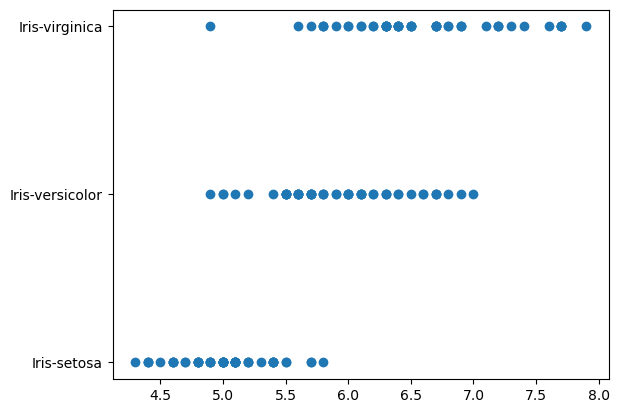

In [27]:
plt.scatter(slen, s)

The result of the scatter plot doesn't show any correlation because the result is a straight line of each class. The only information that shows is that sepal length is usually higher in the iris virginica, and smaller in the iris setosa. 

https://www.w3schools.com/datascience/ds_stat_correlation.asp

In this study it's possible to observe the correlation between the floating variables. In order to show all of them in one single figure, with all scatter plots possible, I will use again the plt.subplots() function. The layout can be reproduced with 2 rows 3 columns because there're 4 variables, and if I want to create a scatter plot of each pair, there're a total of 6 plots. Again I need to define the position of each scatter plot with axs[row, column].scatter, with edge color and then a individual title with axs[row, column].set_title.

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py

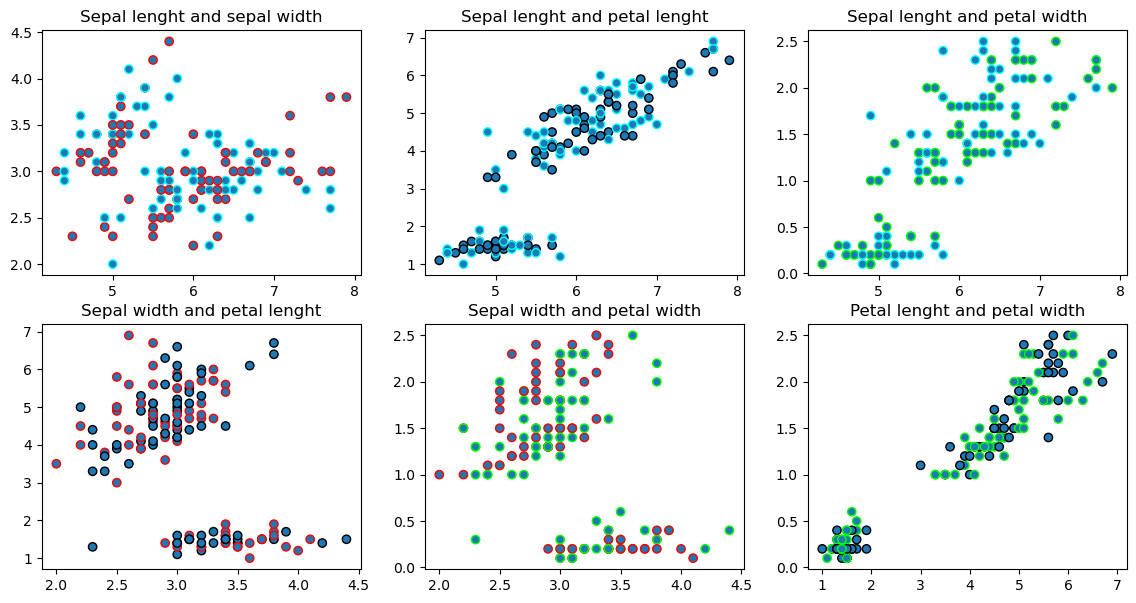

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))

axs[0, 0].scatter(slen, swid, edgecolors=["cyan","red"])
axs[0, 0].set_title("Sepal lenght and sepal width")
axs[0, 1].scatter(slen, plen, edgecolors=["cyan","black"])
axs[0, 1].set_title("Sepal lenght and petal lenght")
axs[0, 2].scatter(slen, pwid, edgecolors=["cyan","lime"])
axs[0, 2].set_title("Sepal lenght and petal width")
axs[1, 0].scatter(swid, plen, edgecolors=["red","black"])
axs[1, 0].set_title("Sepal width and petal lenght")
axs[1, 1].scatter(swid, pwid, edgecolors=["red","lime"])
axs[1, 1].set_title("Sepal width and petal width")
axs[1, 2].scatter(plen, pwid, edgecolors=["black","lime"])
axs[1, 2].set_title("Petal lenght and petal width")
plt.show()

### Pearson Correlation Coefficient
***
There other ways to explore the correlation, with Pearson coefficient the results generated will vary between 1 and -1. The closer is the number to 1 or -1, the stronger is the relation between variables. If number is close to 0, then the variables have very weak relation, and if equal to 0, there's no association. To check the correlation, np.corrcoef(1_variable, 2_variable)

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

In [24]:
print(np.corrcoef(slen, swid))
print(np.corrcoef(slen, plen))
print(np.corrcoef(slen, pwid))
print(np.corrcoef(swid, plen))
print(np.corrcoef(swid, pwid))
print(np.corrcoef(plen, pwid))

[[ 1.         -0.10936925]
 [-0.10936925  1.        ]]
[[1.         0.87175416]
 [0.87175416 1.        ]]
[[1.         0.81795363]
 [0.81795363 1.        ]]
[[ 1.        -0.4205161]
 [-0.4205161  1.       ]]
[[ 1.         -0.35654409]
 [-0.35654409  1.        ]]
[[1.        0.9627571]
 [0.9627571 1.       ]]


The results show that the variables with stronger correlation are: 
* sepal length and petal length with 0.871; 
* sepal length and petal width with 0.817; 
* petal length with petal width with 0.962. 

The weakest are: 
* sepal length and sepal width with -0.109; 
* sepal width and petal length with -0.420; 
* sepal width and petal width with -0.356.

While checking the scatter plot together with the Pearson correlation results, the variables with strong relation have plots where most samples are found together and both variables have a tendency of increasing together, where the weakest have the samples more disperse in the plot.

### Comparison to other studies
***
There's other studies regarding the Iris dataset. Dan Alexandru publish in kaggle a simple analysis as well, and for the correlation he presented the following heat map:

<img src="https://www.kaggleusercontent.com/kf/1397424/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..azMP0Ne06PQQX2SpO-gz4Q.qhD7yewVoyMhfqC4SOnJDrGkc1dvYMmcEUDoMxB_OWNO6rhmhuz8WkBZT50av57e1s6d-ru955fevCuMg_dC3dd8Pc8CKPfTDjMDIWxBRY8YUgiLgK3FeEptcwsjf_vl7vB6Ai7fUPmc-kIiEKHz1dPL0mAxG2ksjoPIDO-r-7giXgURGWephtKlzndVpVEfjXJ8o3HeUK3ajChh0fodHTSjLJfqX2weT3_26loWM-oaMmPnW90KZDefxkXUAHmot9vRh2UlEEEuGr8fKG4XKRcr64CVlW7WtLCvFWpsaJBmR2kDceTtk9pvdcCYGRCJIFnD_kKSmhlQENgCY2sWGpNZXI9r9cZzzaQ8a_G6CdLAlD7ml7nFqcFDWZ993KD-hKAmmUPyfHo5enQcOleyc_fQEpmPG0STTywxNfrgjQItDuy53k-wynkQXjpwfya2wiWyWz4s0_7vRkH0IQ6Hs88gX88SrMcwdaTalB3Qa0ikYEq5UfHgcmRGTluJyBkxj-Ib8mN7IHUYFVdS8ZoTfiLiTlYkGUc0PfaQzDHnXLKWDafNjG923R1bh2aJ0CWsqFem-4c5EDt4GElmFLiBb2i6jpMhsOlq3Rzmp8PLxD0rfwyjMLoKBLdrcLIpNN5Qq5cuLKyM6NC1bcgAnxzcVnVyWKcBe3KK_yAmAAaprT8.2ByQYdRouGXbHZl5AchoXA/__results___files/__results___13_3.png" width="500px" height="300px" />

*Image generated by Dan Alexandru, in his analysis, and resized following the Jupyter notebook documentation [regarding images and figures](https://jupyterbook.org/en/stable/content/figures.html#raw-html-images).*

The results obtained are essentially the same, where in the heat map shows that variables with strong correlation are represented in red and the weak ones with light grey.

https://www.kaggle.com/code/danalexandru/simple-analysis-of-iris-dataset

In another study found in Kaggle, done by Xavier, there's a figure with the scatter and density plots, and correlation:

<img src="https://www.kaggleusercontent.com/kf/25551327/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..rykW9ogQ6eL6hMtjoL1TsQ._4I2yQCNYhQNqTw1M3DhHmVskN1F-ijApc4u6egQjnDPMBqxN8_0BbDS1APFTWs1kZgzbMychSTiCguwVLnOvEs7opmDHoDQv6D3HN5u3Ym5s2qYxFoWFmmerTVw6d8ioe0lrM_6nzOcX_GFEZwFL7rJKrr3FOGyn0TIOQKX7ft5Az5lVoIN7zLFZ7kII0XgNKCkJnrCL9WQrlWgY_YasB7IKBwJdjKgLoo38TeEKAG8_H9kpk4H9zRvAdy5msSHr4goE6g4QtIIIyutG8hcrcm2wp9l5qCX_cLWMTSXDl_4tpbsohYdCBohSA7LbDWqp5gIJ07ACbiMtW4LhRasQT5UAhnfPt8OwGcQ_x7N4IMf512PrwtpuM7xhomfDf5ZqC8H2fDJrTYl5IAK0GOw0Jz2lpNxVJQq07XoIlE4mUoPMpJzHtnZPeb8JaIZGYtUCSurAQQIzq-frSc2ySOIDQa4QgPVt2C1DIr21T5WU5D_y1USGdeSiFpcQb9iHgwjXzEyAahuxTJI1BNJBXNMJlyARKdrj_edNiHnLhDdii31PhM4wmAONlmUr39u2BNFnY6Q-HE4jhPJwWBj3Jxx4tfTjwITKDK2qR0FyLcoFuCBhfA8nZ8TbrVbGXY5egEHUflM7kXNAHo9Ud6Yk89wVxfARZHM1nXLePDxP0aJ3vE.P2lJE0Tps_i3fNLbzf4RuA/__results___files/figure-html/unnamed-chunk-10-1.png" width="700px" height="400px" />
*Image taken from the study of Xavier, in the link above.*

This study produces same results as well for the scatter plots and correlation but it also contains more information. It shows correlation with a 3rd variable, class of Iris. When the correlations are done separately by class, these are very different than when all samples are considered. Per example, generally the sepal length and sepal width have a very weak correlation, but when done individually for each class, the correlation is much higher for all of them. In the other hand, the correlation between petal length and petal width that in general is high, when each class is considered, the correlation is way lower, specially in the Virginica and Setosa class. 

This study shows that in some cases, to get to know more about the samples, a 3rd variable is needed to explain better the correlation since the results of 1 variable can change the results significantly, reproducing a totally different view about the data set. That's why is important to explore the data with different tools, in order to explain it better and to make accurate predictions.

https://www.kaggle.com/code/xvivancos/tutorial-knn-in-the-iris-data-set

***
## End